# Class 12: Another look at the cardiac data (HINTS for the Olympic Dataset)

Data from Kaggle see [https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)
You can find out more about the original dataset [here.](https://archive.ics.uci.edu/dataset/45/heart+disease)
1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl (1=yes, 0=no)
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina (1=yes, 0=no)
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal:  A blood disorder called thalassemia 0 = normal; 1 = fixed defect; 2 = reversable defect

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

*target* (0 = no heart disease and 1 = heart disease)

<img src="https://www.wikidoc.org/images/5/53/SinusRhythmLabels.png" alt="EKG Image" width=500, height="auto" class="blog-image">

In [1]:
from datascience import *
import numpy as np
# import for plotting
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# Fix for datascience plots
import collections as collections
import collections.abc as abc
collections.Iterable = abc.Iterable

In [2]:
path = 'data/'
data = path + 'heart.csv'
heart = Table.read_table(data)
heart

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
52,1,0,125,212,0,1,168,0,1,2,2,3,0
53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
61,1,0,148,203,0,1,161,0,0,2,1,3,0
62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
58,0,0,100,248,0,0,122,0,1,1,0,2,1
58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


# Generating a top-N list

**Goal:** Generate a list of the age, and target values of the five patients in this study with the highest cholestoral levels. 

## Step 1: Sort the list on cholesterol.

In [5]:
# descending = True because we want to go from high to low
heart.sort('chol', descending=True)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
63,0,0,150,407,0,0,154,0,4,1,3,3,0


## Step 2: Select only the columns we want.

In [4]:
heart.sort('chol', descending=True).select('chol', 'age', 'target')

chol,age,target
564,67,1
564,67,1
564,67,1
417,65,1
417,65,1
417,65,1
409,56,0
409,56,0
409,56,0
407,63,0


## Step 3: Select only the top N rows using .take()
The .take() method selects rows from a table. You pass it an array of row numbers. In this case we want the top 5, which would be rows 0, 1, 2, 3, 4 in our sorted table. Rather than type out those numbers by hand, we generate them with np.arange().

In [7]:
N = 5
heart.sort('chol', descending=True).select('chol', 'age', 'target').take(np.arange(N))

chol,age,target
564,67,1
564,67,1
564,67,1
417,65,1
417,65,1


## There you have it!
You have generated a top N list.

# Now you try -- List the ages of the 10 oldest patients in the study.

# Making a nice-looking histogram
Let's look a the distribution of cholesterol values using a histogram.

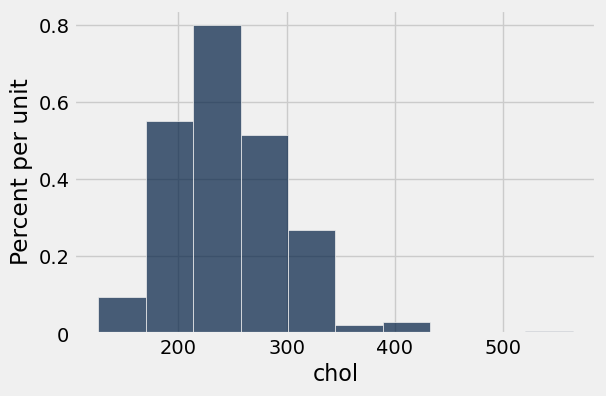

In [9]:
heart.hist('chol')

## Adjust the number of bins
This correct number of bins in a histogram is a bit of a dark art: not enough and you can't see the full distribution, too many and you each data point goes into it's own bin. There are rules of thumb. You can read more about it [here](https://www.statisticshowto.com/choose-bin-sizes-statistics/).

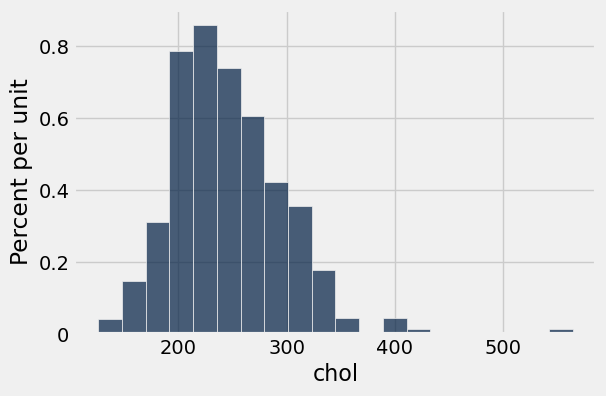

In [17]:
# Try doubling the default of 10 bins
heart.hist('chol', bins=20)

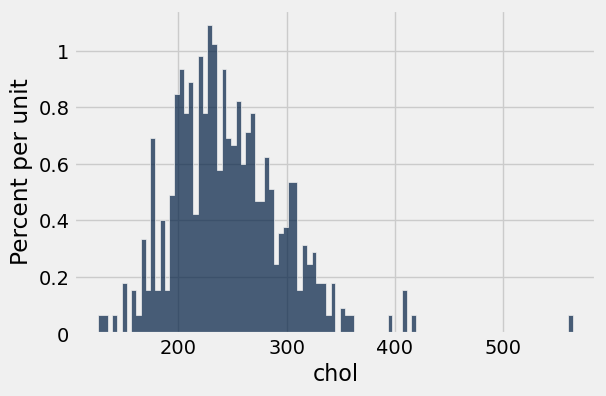

In [19]:
# This is what happens if you have too many bins.
heart.hist('chol', bins=100)

Often, we want bin boundares to fall at specific values. For example, we could bin that data such that we are dividing the range of cholesterol values into bins 25 units wide by providing a list of the lower bounds of each bin.

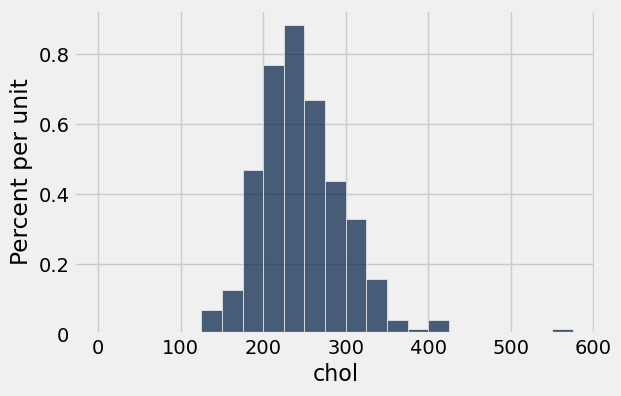

In [23]:
bins = np.arange(0, 600, 25)
heart.hist('chol', bins=bins)

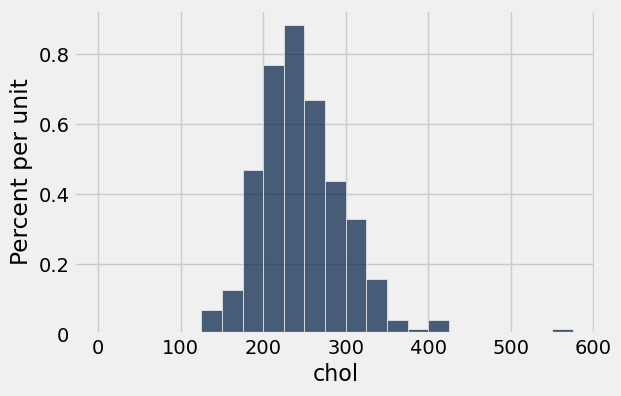

In [24]:
bins = np.arange(0, 600, 25)
heart.hist('chol', bins=bins, density=True)

## Comparing histograms of groups
Here we compare the cholesterol distribution by gender of these heart patients.

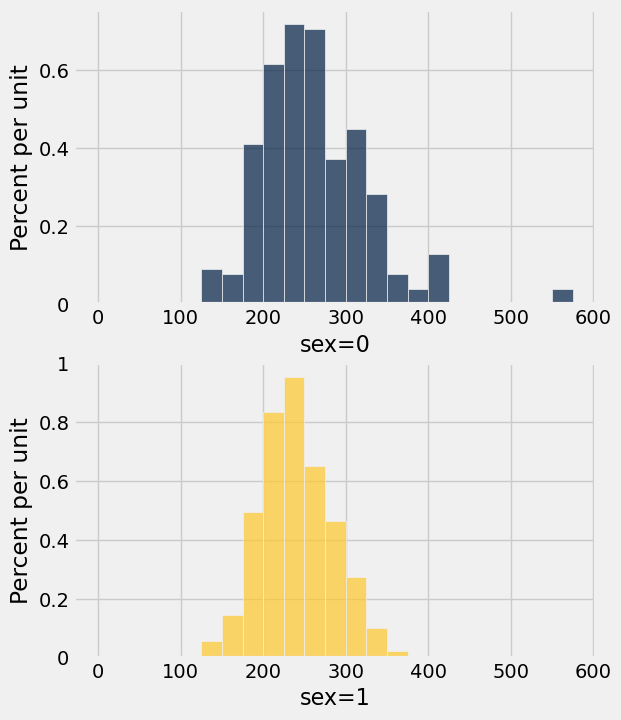

In [36]:
# Or you can plot them side by side.
heart.hist('chol', group="sex", bins=bins, overlay=False)

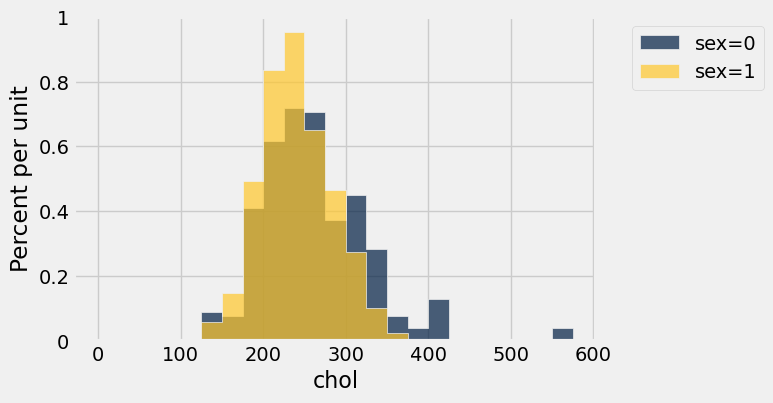

In [34]:
heart.hist('chol', group="sex", bins=bins)

# Now you try: Make a histogram show the distribution of resting blood pressure (trestbps).

# Now compare the distibutions by gender. Do male & female patients in the study have different resting blood pressures?